### **Data Preparation**

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split ,  GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score
from sklearn.model_selection import learning_curve
import time

In [255]:
# Load data dari file csv
df = pd.read_csv("data_provinsi.csv")
df.head(5)

,tahun,nama_provinsi,jenis_sampah,persentase
0,ALL,Aceh,Sisa Makanan,38.920274
1,ALL,Aceh,Kayu/Ranting,12.971451
2,ALL,Aceh,Kertas/Karton,11.204433
3,ALL,Aceh,Plastik,19.621134
4,ALL,Aceh,Logam,3.371037


### **Exploratory Data Analysis**

In [256]:
df.shape

(2080, 4)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tahun          2080 non-null   object 
 1   nama_provinsi  2080 non-null   object 
 2   jenis_sampah   2080 non-null   object 
 3   persentase     2080 non-null   float64
dtypes: float64(1), object(3)
memory usage: 65.1+ KB


In [258]:
# cek missing values
df.isnull().sum()

tahun            0
nama_provinsi    0
jenis_sampah     0
persentase       0
dtype: int64

In [259]:
# cek duplikat
df.duplicated().sum()

np.int64(4)

In [260]:
df.describe()

,persentase
count,2080.000000
mean,11.441742
std,12.643812
min,0.080000
25%,2.432375
50%,6.545222
75%,15.548808
max,72.199997


In [261]:
# menampilkan nilai unik dalam kolom 'tahun' untuk memeriksa apakah ada nilai seperti 'ALL', 'None', dll.
print(df['tahun'].value_counts())

tahun
2022    306
ALL     304
2023    297
2019    295
2024    294
2020    289
2021    287
2018      8
Name: count, dtype: int64


In [262]:
# statistik deskriptif untuk kolom kategorikal
df.describe(include=['object'])

,tahun,nama_provinsi,jenis_sampah
count,2080,2080,2080
unique,8,34,9
top,2022,Aceh,Sisa Makanan
freq,306,126,235


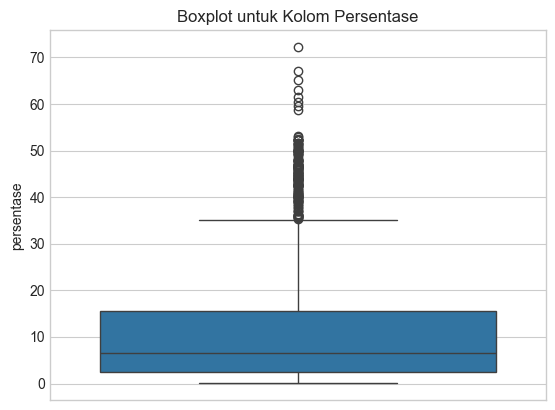

Outliers pada kolom 'persentase':

     tahun      nama_provinsi  jenis_sampah  persentase
0      ALL               Aceh  Sisa Makanan   38.920274
27     ALL     Sumatera Barat  Sisa Makanan   42.549999
36     ALL               Riau  Sisa Makanan   35.475000
45     ALL              Jambi  Sisa Makanan   45.246667
54     ALL   Sumatera Selatan  Sisa Makanan   39.258889
...    ...                ...           ...         ...
1993  2024   Kalimantan Timur  Sisa Makanan   46.946667
2002  2024   Kalimantan Utara  Sisa Makanan   52.380001
2011  2024     Sulawesi Utara  Sisa Makanan   41.096154
2029  2024   Sulawesi Selatan  Sisa Makanan   46.841818
2038  2024  Sulawesi Tenggara  Sisa Makanan   43.416667

[167 rows x 4 columns]


In [263]:
# deteksi outliers dengan boxplot
sns.boxplot(data=df['persentase'])
plt.title('Boxplot untuk Kolom Persentase')
plt.show()

Q1 = df['persentase'].quantile(0.25)  
Q3 = df['persentase'].quantile(0.75)  
IQR = Q3 - Q1  

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['persentase'] < lower_bound) | (df['persentase'] > upper_bound)]

print(f"Outliers pada kolom 'persentase':\n")
print(outliers)

bakal ditangani pake metode capping

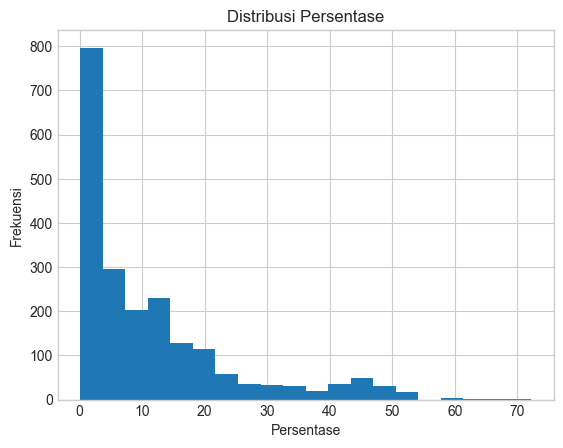

In [264]:
# Histogram untuk kolom numerik
df['persentase'].hist(bins=20)
plt.title('Distribusi Persentase')
plt.xlabel('Persentase')
plt.ylabel('Frekuensi')
plt.show()

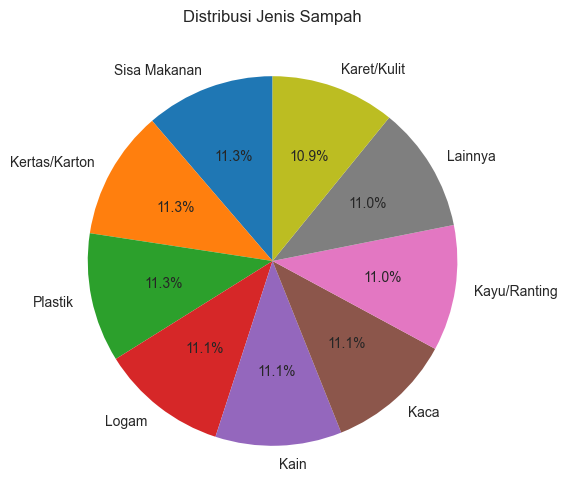

In [265]:
# pie chart untuk 'jenis_sampah'
plt.figure(figsize=(8, 6))
df['jenis_sampah'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Jenis Sampah')
plt.ylabel('')
plt.show()

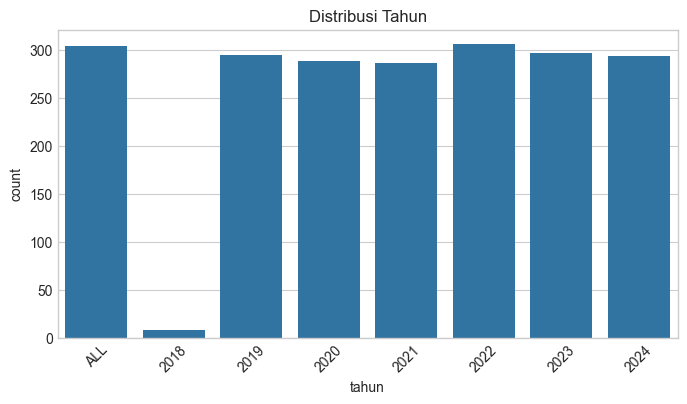

In [266]:
# visualisasi distribusi 'tahun'
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='tahun')
plt.title('Distribusi Tahun')
plt.xticks(rotation=45)
plt.show()

Top 5 Provinsi dengan Sampah Terbanyak:
nama_provinsi
Aceh              1407.512812
Papua Barat        899.200001
Sumatera Barat     738.010598
Jawa Barat         728.141890
Jambi              725.698332
Name: persentase, dtype: float64


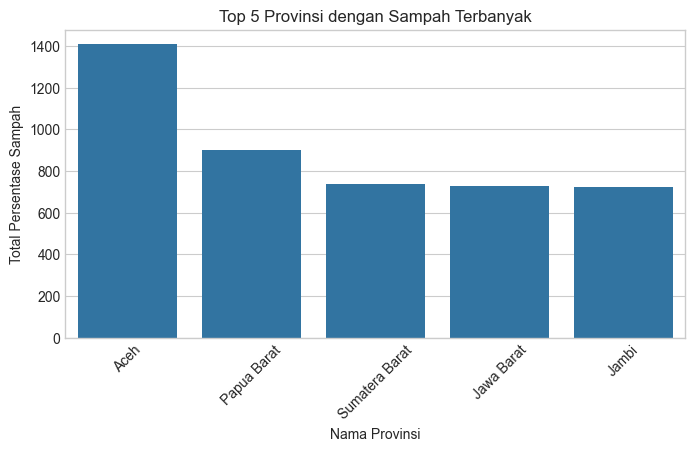

In [267]:
top_provinsi = df.groupby('nama_provinsi')['persentase'].sum().sort_values(ascending=False).head(5)

print("Top 5 Provinsi dengan Sampah Terbanyak:")
print(top_provinsi)

# top 5 Provinsi dengan Sampah Terbanyak
plt.figure(figsize=(8, 4))
sns.barplot(x=top_provinsi.index, y=top_provinsi.values)
plt.title('Top 5 Provinsi dengan Sampah Terbanyak')
plt.xlabel('Nama Provinsi')
plt.ylabel('Total Persentase Sampah')
plt.xticks(rotation=45)
plt.show()


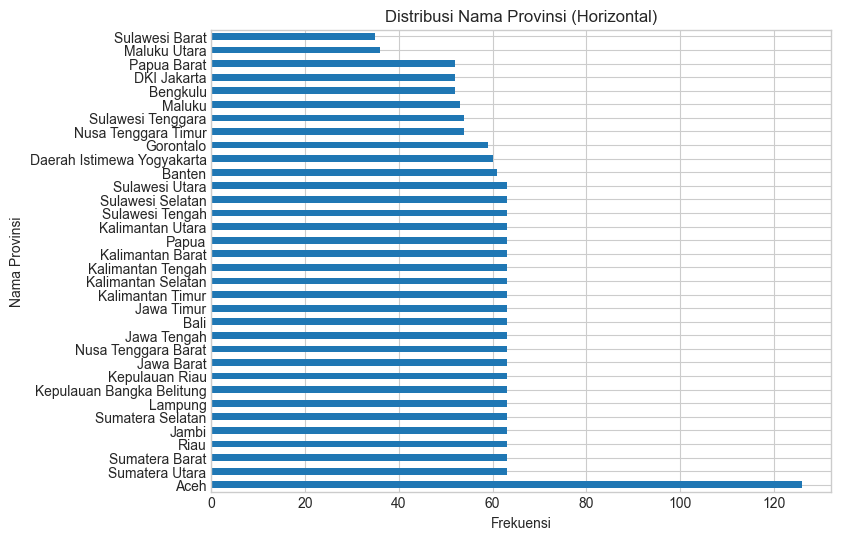

In [268]:
# Horizontal Bar Plot untuk distribusi nama_provinsi
plt.figure(figsize=(8,6))
df['nama_provinsi'].value_counts().plot.barh()
plt.title('Distribusi Nama Provinsi (Horizontal)')
plt.xlabel('Frekuensi')
plt.ylabel('Nama Provinsi')
plt.show()

### **Data Preprocessing**

In [269]:
# menghapus baris yang memiliki nilai 'ALL' di kolom 'tahun'
df = df[df['tahun'] != 'ALL']

In [270]:
# konversi tipe data tahun jadi int
df['tahun'] = df['tahun'].astype(int)
print(df['tahun'].dtype)

int64


In [271]:
# menghapus duplikat
df = df.drop_duplicates()

# cek
print(f"Ada {df.duplicated().sum()} baris duplikat di dataset.")

Ada 0 baris duplikat di dataset.


In [272]:
  # Simpan daftar kategori unik SEBELUM di-encode untuk UI nanti
unique_provinces = sorted(list(df['nama_provinsi'].unique()))
unique_waste_types = sorted(list(df['jenis_sampah'].unique()))


In [273]:
# encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# one hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print(df.head())

     tahun  persentase  nama_provinsi_Bali  nama_provinsi_Banten  \
304   2018   44.000000               False                 False   
305   2018   11.000000               False                 False   
306   2018   26.000000               False                 False   
307   2018   19.000000               False                 False   
312   2019   41.318588               False                 False   

     nama_provinsi_Bengkulu  nama_provinsi_DKI Jakarta  \
304                   False                      False   
305                   False                      False   
306                   False                      False   
307                   False                      False   
312                   False                      False   

     nama_provinsi_Daerah Istimewa Yogyakarta  nama_provinsi_Gorontalo  \
304                                     False                    False   
305                                     False                    False   
306                 

In [274]:
# handling outliers
# Daftar kolom yang ingin dianalisis untuk outliers
columns_to_check = ['tahun', 'persentase']

# Looping melalui setiap kolom untuk deteksi dan penanganan outliers
for col in columns_to_check:
    # Menghitung Q1 dan Q3 untuk kolom saat ini
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan lower dan upper bound untuk capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping pada kolom saat ini
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    # Mengecek outliers setelah capping
    outliers_after_capping = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Jumlah outliers setelah capping di kolom '{col}': {outliers_after_capping.shape[0]}")

Jumlah outliers setelah capping di kolom 'tahun': 0
Jumlah outliers setelah capping di kolom 'persentase': 0


In [275]:
# normalisasi (standardscaler)
scaler = StandardScaler()
df['persentase'] = scaler.fit_transform(df[['persentase']])

In [276]:
X = df.drop(columns=['persentase'])  # Fitur
y = df['persentase']  # Target

In [277]:
# split data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Modelling**

### **Inisiasi Model**

In [278]:
 # Tentukan grid parameter yang akan diuji
param_grid_rf = {
        'n_estimators': [50, 100, 150],       # Jumlah pohon
        'max_depth': [8, 10, 12, None],       # Kedalaman maksimum pohon
        'min_samples_leaf': [3, 5, 7],        # Jumlah minimum sampel di daun
        'min_samples_split': [5, 10]          # Jumlah minimum sampel untuk membelah node
    }

In [279]:
# Inisialisasi model
rf_base = RandomForestRegressor(random_state=42)

In [280]:
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf, 
                               cv=5, n_jobs=-1, scoring='r2', verbose=1)
    
    # Jalankan pencarian
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
    
print(f"GridSearchCV selesai dalam {end_time - start_time:.2f} detik.")
    
    # Tampilkan hasil terbaik
print("\nParameter terbaik ditemukan untuk Random Forest:")
print(grid_search.best_params_)
 # Dapatkan model RF terbaik
best_rf_model = grid_search.best_estimator_
    
    # Evaluasi model terbaik pada data uji
y_pred_rf_test = best_rf_model.predict(X_test)
print(f"\nSkor R2 Uji (Random Forest Terbaik): {r2_score(y_test, y_pred_rf_test):.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
GridSearchCV selesai dalam 13.30 detik.

Parameter terbaik ditemukan untuk Random Forest:
{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}

Skor R2 Uji (Random Forest Terbaik): 0.8618


In [281]:
 # Latih model RF final (menggunakan parameter dari GridSearchCV)
rf_final = grid_search.best_estimator_
    # Cara yang lebih eksplisit dan aman adalah membuat instance baru dengan parameter terbaik
    # rf_final = RandomForestRegressor(random_state=42, **grid_search.best_params_)
rf_final.fit(X, y) # Melatih ulang model terbaik pada seluruh data

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                      random_state=42)

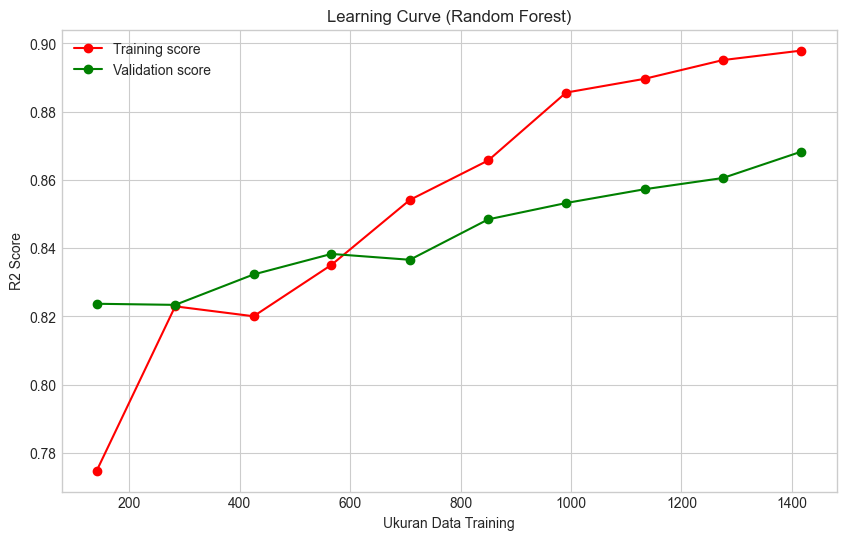

In [282]:
def plot_learning_curve(estimator, title, X, y, cv=5):
    """
    Membuat plot learning curve untuk sebuah model sesuai permintaan.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color="g", label='Validation score')
    
    plt.xlabel('Ukuran Data Training')
    plt.ylabel('R2 Score')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
plot_learning_curve(best_rf_model, "Learning Curve (Random Forest)", X, y)

In [283]:

def predict_and_plot(province_name, rf_model, scaler, X_columns, unique_provinces, unique_waste_types):
    """
    Melakukan prediksi hanya dengan Random Forest dan menampilkan plot.
    """
    # ... (Fungsi ini tidak berubah, dibiarkan sama) ...
    prediction_year = 2025
    if province_name not in unique_provinces:
        print(f"\n[ERROR] Provinsi '{province_name}' tidak ditemukan.")
        for i, prov in enumerate(unique_provinces):
            print(f"- {prov}", end="\n" if (i + 1) % 4 == 0 else "\t")
        print("\n")
        return

    predictions = []
    for waste_type in unique_waste_types:
        raw_input_df = pd.DataFrame([{'tahun': prediction_year, 'nama_provinsi': province_name, 'jenis_sampah': waste_type}])
        encoded_input_df = pd.get_dummies(raw_input_df)
        final_input = encoded_input_df.reindex(columns=X_columns, fill_value=0)
        
        rf_pred_scaled = rf_model.predict(final_input)[0]
        rf_pred_original = scaler.inverse_transform(np.array([[rf_pred_scaled]]))[0][0]

        predictions.append({'jenis_sampah': waste_type, 'prediksi_rf': rf_pred_original})
        
    df_pred = pd.DataFrame(predictions)
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(14, 8))
    plt.plot(df_pred['jenis_sampah'], df_pred['prediksi_rf'], marker='x', linestyle='--', label='Prediksi Random Forest (Optimized)')
    plt.title(f'Prediksi Persentase Sampah di {province_name} untuk Tahun {prediction_year}', fontsize=16)
    plt.xlabel('Jenis Sampah', fontsize=12)
    plt.ylabel('Prediksi Persentase (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


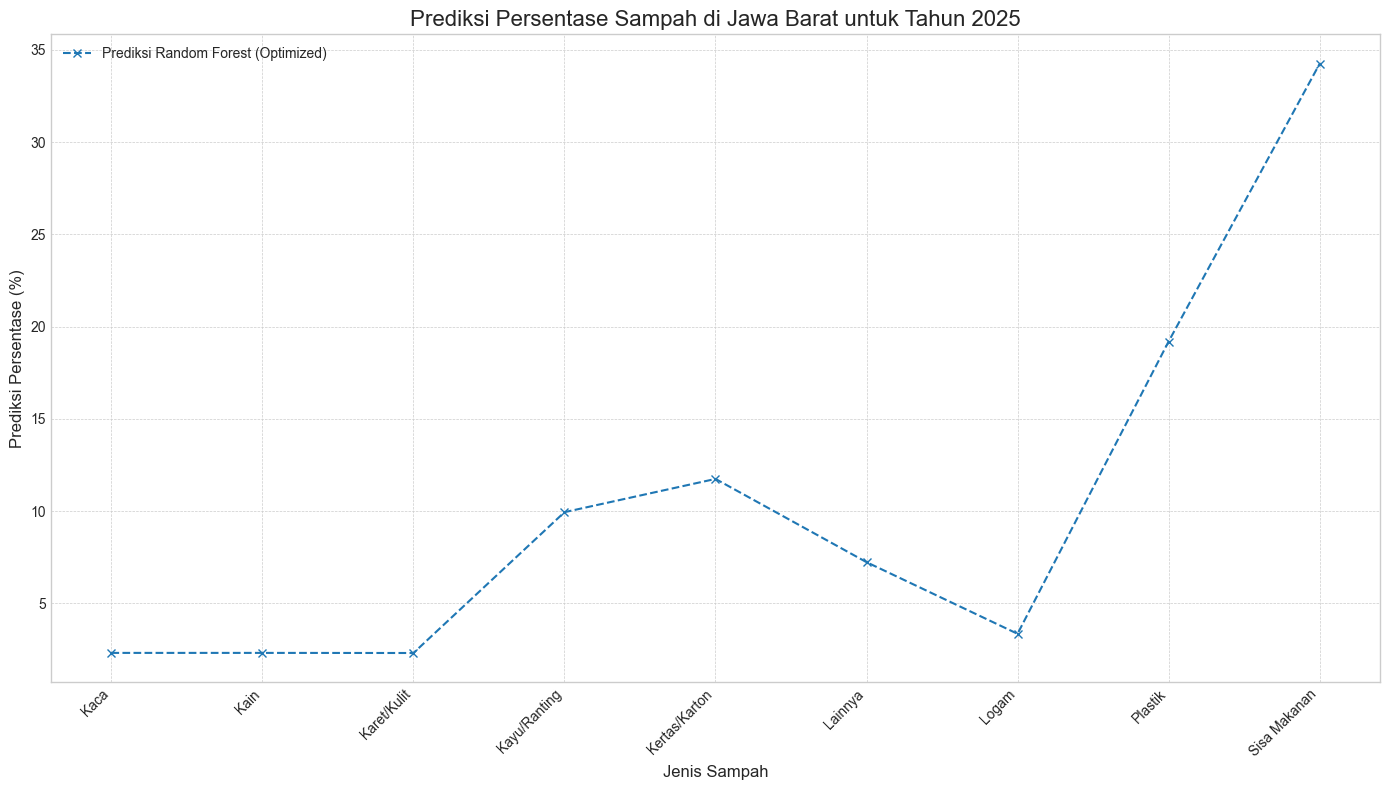

In [284]:
PROVINSI_TARGET = "Jawa Barat"  # Ganti dengan nama provinsi yang diinginkan
predict_and_plot(PROVINSI_TARGET, best_rf_model, scaler, X.columns, unique_provinces, unique_waste_types)

In [285]:
# Pastikan sel ini sudah dijalankan:
import joblib
import json

joblib.dump(best_rf_model, 'waste_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

training_columns = X.columns.tolist()
info = {
    'training_columns': training_columns,
    'unique_provinces': unique_provinces,
    'unique_waste_types': unique_waste_types
}
with open('model_info.json', 'w') as f:
    json.dump(info, f, indent=4)

In [ ]:
import pandas as pd
import numpy as np
X_columns = X.columns.tolist()
def predict_for_all_provinces(model, scaler, feature_columns, all_provinces, all_waste_types, year=2025):
    
    all_predictions = []

    # Iterasi melalui setiap provinsi
    for province in all_provinces:
        # Iterasi melalui setiap jenis sampah
        for waste_type in all_waste_types:
            
            # 1. Membuat feature vector untuk kombinasi ini
            #    Kita mulai dengan dictionary yang berisi semua nol
            input_data = {col: 0 for col in feature_columns}
            
            # 2. Set nilai untuk fitur yang relevan
            input_data['tahun'] = year
            
            # Set one-hot encoding untuk provinsi dan jenis sampah
            # Pastikan nama kolom one-hot encoding-nya cocok dengan yang digunakan saat training
            province_col_name = f'nama_provinsi_{province}'
            waste_type_col_name = f'jenis_sampah_{waste_type}'

            if province_col_name in input_data:
                input_data[province_col_name] = 1
            
            if waste_type_col_name in input_data:
                input_data[waste_type_col_name] = 1

            # 3. Ubah menjadi DataFrame dengan urutan kolom yang benar
            input_df = pd.DataFrame([input_data], columns=feature_columns)
            
            # 4. Lakukan scaling dan prediksi
            scaled_input = scaler.transform(input_df)
            predicted_percentage = model.predict(scaled_input)[0]
            
            # Pastikan persentase tidak negatif
            if predicted_percentage < 0:
                predicted_percentage = 0
            
            # 5. Simpan hasilnya
            all_predictions.append({
                'tahun': year,
                'nama_provinsi': province,
                'jenis_sampah': waste_type,
                'persentase': predicted_percentage
            })

    return pd.DataFrame(all_predictions)

predictions_df = predict_for_all_provinces(best_rf_model, scaler, 
                                           X_columns, unique_provinces, unique_waste_types)

# Simpan DataFrame ke file CSV
output_filename = 'predictions_2025.csv'
predictions_df.to_csv(output_filename, index=False, float_format='%.4f')